<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.256503,55.423226,9.035514,135.715243,118.564205,17.151038
1,0.0,1.0,80.179068,79.452898,66.119604,235.751570,157.348201,78.403369
2,0.0,2.0,54.675272,62.740785,6.891532,134.307590,119.833070,14.474520
3,0.0,3.0,45.923246,56.432549,16.847524,129.203319,106.419493,22.783827
4,0.0,4.0,98.270687,99.423049,-39.808131,167.885606,191.600557,-23.714951
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,73.360629,43.424344,52.953714,179.738686,123.472786,56.265901
19996,999.0,16.0,72.940710,72.811746,57.506778,213.259234,142.552496,70.706738
19997,999.0,17.0,30.238258,79.756105,-24.574307,95.420057,115.100758,-19.680701
19998,999.0,18.0,79.981833,70.458207,-119.288826,41.151214,146.281390,-105.130176


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.256503,55.423226,9.035514,135.715243,118.564205,17.151038
1,0.0,1.0,80.179068,79.452898,66.119604,235.751570,157.348201,78.403369
2,0.0,2.0,54.675272,62.740785,6.891532,134.307590,119.833070,14.474520
3,0.0,3.0,45.923246,56.432549,16.847524,129.203319,106.419493,22.783827
4,0.0,4.0,98.270687,99.423049,-39.808131,167.885606,191.600557,-23.714951
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,73.360629,43.424344,52.953714,179.738686,123.472786,56.265901
19996,999.0,16.0,72.940710,72.811746,57.506778,213.259234,142.552496,70.706738
19997,999.0,17.0,30.238258,79.756105,-24.574307,95.420057,115.100758,-19.680701
19998,999.0,18.0,79.981833,70.458207,-119.288826,41.151214,146.281390,-105.130176


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    61.256503  55.423226    9.035514  135.715243  118.564205   
      1.0    80.179068  79.452898   66.119604  235.751570  157.348201   
      2.0    54.675272  62.740785    6.891532  134.307590  119.833070   
      3.0    45.923246  56.432549   16.847524  129.203319  106.419493   
      4.0    98.270687  99.423049  -39.808131  167.885606  191.600557   
...                ...        ...         ...         ...         ...   
999.0 15.0   73.360629  43.424344   52.953714  179.738686  123.472786   
      16.0   72.940710  72.811746   57.506778  213.259234  142.552496   
      17.0   30.238258  79.756105  -24.574307   95.420057  115.100758   
      18.0   79.981833  70.458207 -119.288826   41.151214  146.281390   
      19.0   68.143747  92.503666  -29.796916  140.850497  151.949906   

                  e_hat  
rep   index              
0.0   0.0     17.151038  
      1.0     78.403369  
      2.0     14.474520  
      3.0     22.783827  
      4.0    -23.714951  
...                 ...  
999.0 15.0    56.265901  
      16.0    70.706738  
      17.0   -19.680701  
      18.0  -105.130176  
      19.0   -11.099409  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    61.256503  55.423226    9.035514  135.715243  118.564205   
      1.0    80.179068  79.452898   66.119604  235.751570  157.348201   
      2.0    54.675272  62.740785    6.891532  134.307590  119.833070   
      3.0    45.923246  56.432549   16.847524  129.203319  106.419493   
      4.0    98.270687  99.423049  -39.808131  167.885606  191.600557   
...                ...        ...         ...         ...         ...   
999.0 15.0   73.360629  43.424344   52.953714  179.738686  123.472786   
      16.0   72.940710  72.811746   57.506778  213.259234  142.552496   
      17.0   30.238258  79.756105  -24.574307   95.420057  115.100758   
      18.0   79.981833  70.458207 -119.288826   41.151214  146.281390   
      19.0   68.143747  92.503666  -29.796916  140.850497  151.949906   

                  e_hat  
rep   index              
0.0   0.0     17.151038  
      1.0     78.403369  
      2.0     14.474520  
      3.0     22.783827  
      4.0    -23.714951  
...                 ...  
999.0 15.0    56.265901  
      16.0    70.706738  
      17.0   -19.680701  
      18.0  -105.130176  
      19.0   -11.099409  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.256503,55.423226,9.035514,135.715243,118.564205,17.151038
1,0.0,1.0,80.179068,79.452898,66.119604,235.751570,157.348201,78.403369
2,0.0,2.0,54.675272,62.740785,6.891532,134.307590,119.833070,14.474520
3,0.0,3.0,45.923246,56.432549,16.847524,129.203319,106.419493,22.783827
4,0.0,4.0,98.270687,99.423049,-39.808131,167.885606,191.600557,-23.714951
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,73.360629,43.424344,52.953714,179.738686,123.472786,56.265901
19996,999.0,16.0,72.940710,72.811746,57.506778,213.259234,142.552496,70.706738
19997,999.0,17.0,30.238258,79.756105,-24.574307,95.420057,115.100758,-19.680701
19998,999.0,18.0,79.981833,70.458207,-119.288826,41.151214,146.281390,-105.130176


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    61.256503  55.423226    9.035514  135.715243  118.564205   
      1.0    80.179068  79.452898   66.119604  235.751570  157.348201   
      2.0    54.675272  62.740785    6.891532  134.307590  119.833070   
      3.0    45.923246  56.432549   16.847524  129.203319  106.419493   
      4.0    98.270687  99.423049  -39.808131  167.885606  191.600557   
...                ...        ...         ...         ...         ...   
999.0 15.0   73.360629  43.424344   52.953714  179.738686  123.472786   
      16.0   72.940710  72.811746   57.506778  213.259234  142.552496   
      17.0   30.238258  79.756105  -24.574307   95.420057  115.100758   
      18.0   79.981833  70.458207 -119.288826   41.151214  146.281390   
      19.0   68.143747  92.503666  -29.796916  140.850497  151.949906   

                  e_hat  
rep   index              
0.0   0.0     17.151038  
      1.0     78.403369  
      2.0     14.474520  
      3.0     22.783827  
      4.0    -23.714951  
...                 ...  
999.0 15.0    56.265901  
      16.0    70.706738  
      17.0   -19.680701  
      18.0  -105.130176  
      19.0   -11.099409  

[20000 rows x 6 columns]

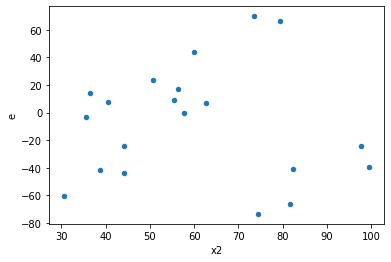

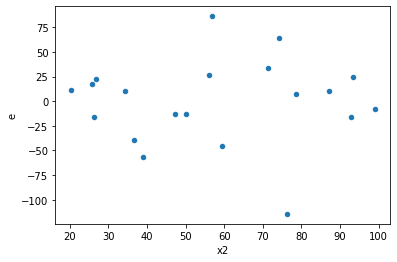

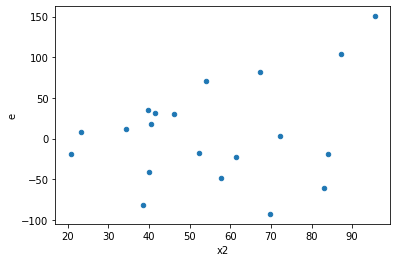

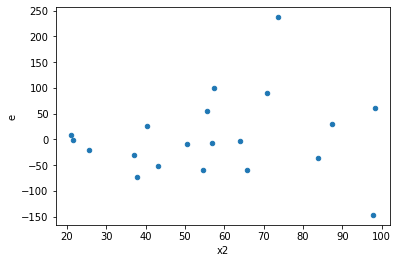

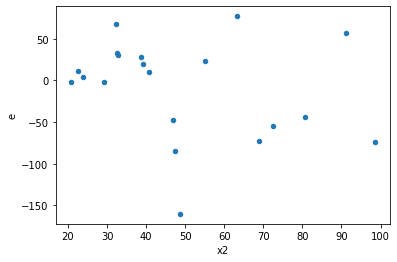

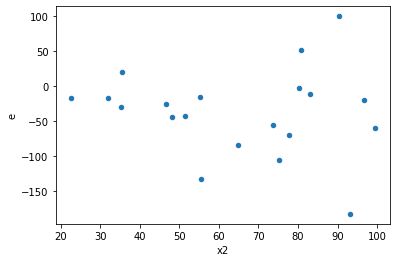

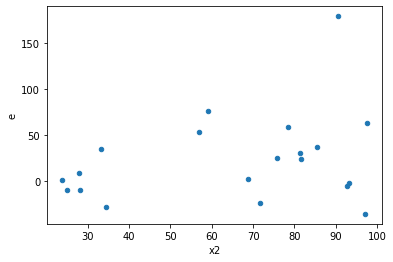

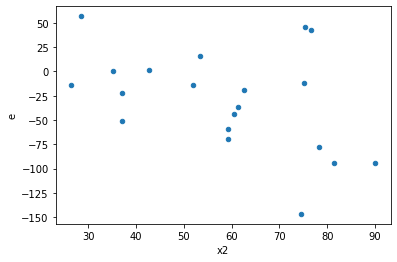

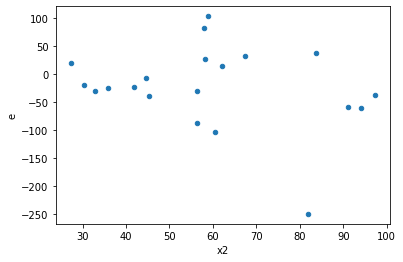

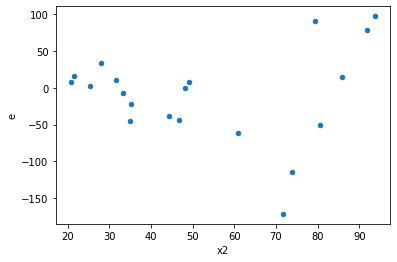

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,2583.3006594760855,12608.16425145937,430.5501099126809,2101.3607085765616,4.880641440325575,0.07496664468281988,0.9625166776585901,0.03748332234140994,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,10741.327092494079,30041.41216122665,1790.2211820823466,5006.902026871108,2.7968063817942252,0.23625353172514618,0.8818732341374269,0.11812676586257309,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,6078.1434536105535,80575.04400624872,1013.0239089350922,13429.174001041452,13.25652226230122,0.006196384455365855,0.9969018077723171,0.0030981922276829277,Reject001=0 : Heteroscedasticity
5.0,6.0,6.0,3022.446285015575,49004.80094817339,503.74104750259585,8167.466824695565,16.21362179077431,0.003587397942015347,0.9982063010289923,0.0017936989710076734,Reject001=0 : Heteroscedasticity
6.0,6.0,6.0,2579.529016287306,28270.558355598852,429.921502714551,4711.759725933142,10.959581449596728,0.010274447451228186,0.9948627762743859,0.005137223725614093,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,2255.5548953123057,20914.867671257776,375.9258158853843,3485.8112785429626,9.27260414487136,0.015860550436346488,0.9920697247818268,0.007930275218173244,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,22029.641842040248,52986.97334622082,3671.606973673375,8831.162224370137,2.4052580485036836,0.30959728904738393,0.845201355476308,0.15479864452369196,Reject001=1 : Homoscedasticity
9.0,6.0,6.0,2450.9597467247063,39614.865419874026,408.49329112078436,6602.477569979004,16.163001237703966,0.0036182642647020202,0.998190867867649,0.0018091321323510101,Reject001=0 : Heteroscedasticity
10.0,6.0,6.0,1517.6103280597379,33350.7922164387,252.93505467662297,5558.46536940645,21.97586007409269,0.0015431964879877302,0.9992284017560061,0.0007715982439938651,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,2583.3006594760855,12608.16425145937,430.5501099126809,2101.3607085765616,4.880641440325575,0.07496664468281988,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,11569.73581843591,3340.2862761580514,1928.2893030726516,556.7143793596753,0.28870894967501676,0.15608060810432348,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,10741.327092494079,30041.41216122665,1790.2211820823466,5006.902026871108,2.7968063817942252,0.23625353172514618,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,6078.1434536105535,80575.04400624872,1013.0239089350922,13429.174001041452,13.25652226230122,0.006196384455365855,Reject001=0 : Heteroscedasticity
4.0,6.0,6.0,16176.110223535654,15267.768025196783,2696.0183705892755,2544.6280041994637,0.9438466858974993,0.9458656362220302,Reject001=1 : Homoscedasticity
5.0,6.0,6.0,3022.446285015575,49004.80094817339,503.74104750259585,8167.466824695565,16.21362179077431,0.003587397942015347,Reject001=0 : Heteroscedasticity
6.0,6.0,6.0,2579.529016287306,28270.558355598852,429.921502714551,4711.759725933142,10.959581449596728,0.010274447451228186,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,2255.5548953123057,20914.867671257776,375.9258158853843,3485.8112785429626,9.27260414487136,0.015860550436346488,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,22029.641842040248,52986.97334622082,3671.606973673375,8831.162224370137,2.4052580485036836,0.30959728904738393,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      885
Reject001=0 : Heteroscedasticity    115
Name: Result_test, dtype: int64